In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\ushak\\Downloads\\Train _sales.csv")

In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
numcols=['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

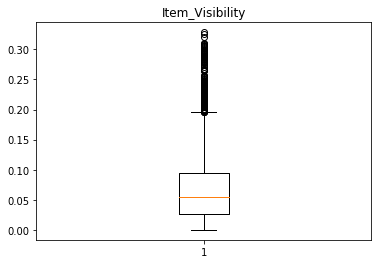

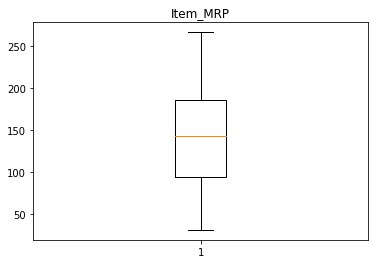

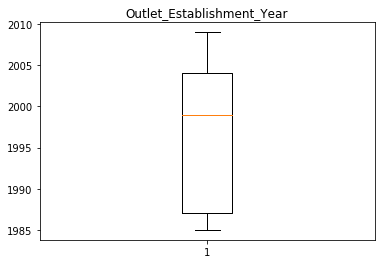

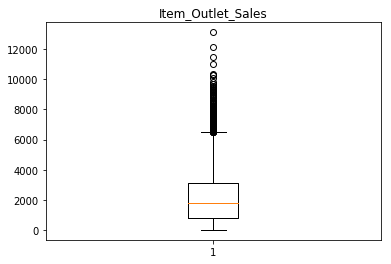

In [7]:
for i in numcols:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [8]:
data.shape

(8523, 12)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
imputer = SimpleImputer()
data[['Item_Weight']]=imputer.fit_transform(data[['Item_Weight']])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.duplicated().sum()

0

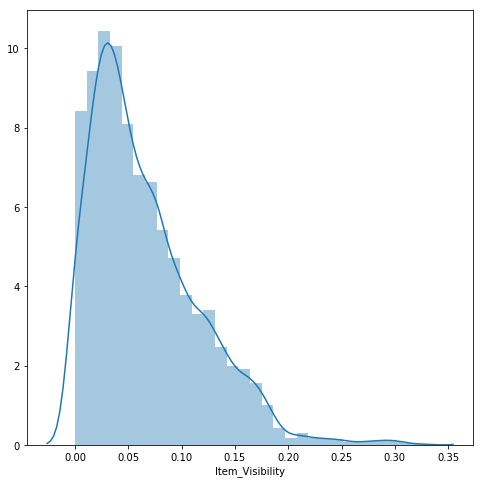

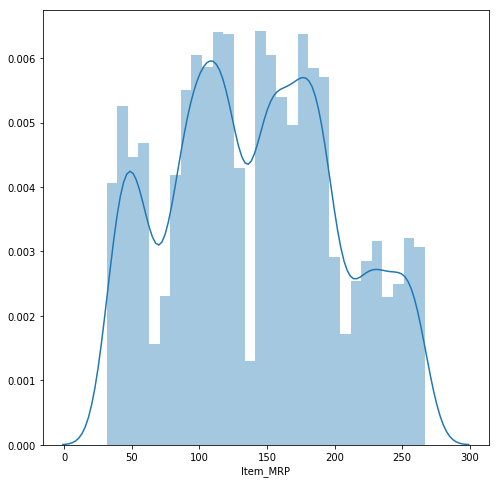

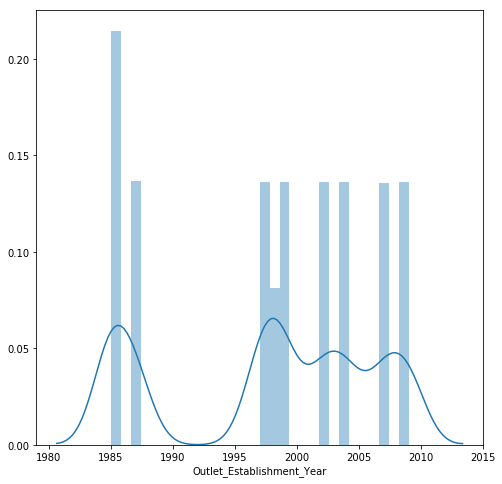

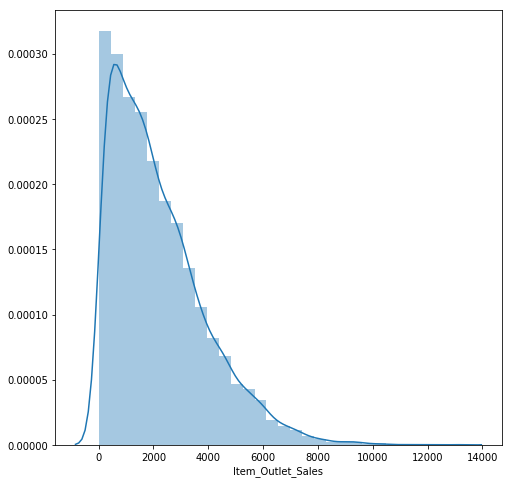

In [13]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [14]:
scaler = StandardScaler()
data[numcols]=scaler.fit_transform(data[numcols])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,-0.970732,Dairy,1.747454,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,5.920,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,17.500,Low Fat,-0.956917,Meat,0.010040,OUT049,0.139541,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,19.200,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,0.020085,Medium,Tier 3,Grocery Store,-0.849103
4,NCD19,8.930,Low Fat,-1.281758,Household,-1.399220,OUT013,-1.293934,High,Tier 3,Supermarket Type1,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,-0.181193,Snack Foods,1.180783,OUT013,-1.293934,High,Tier 3,Supermarket Type1,0.349915
8519,FDS36,8.380,Regular,-0.371154,Baking Goods,-0.527301,OUT045,0.497909,Medium,Tier 2,Supermarket Type1,-0.956402
8520,NCJ29,10.600,Low Fat,-0.599784,Health and Hygiene,-0.897208,OUT035,0.736822,Small,Tier 2,Supermarket Type1,-0.579100
8521,FDN46,7.210,Regular,1.532880,Snack Foods,-0.607977,OUT018,1.334103,Medium,Tier 3,Supermarket Type2,-0.196725


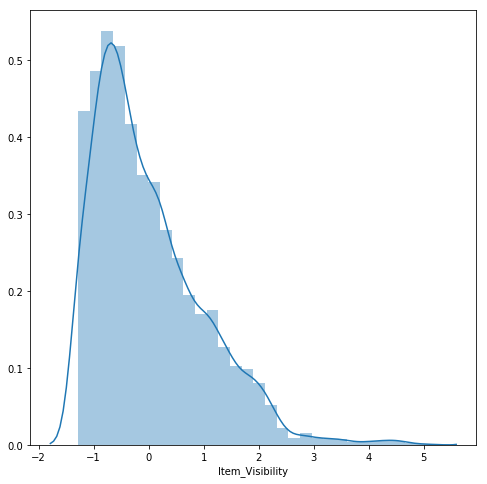

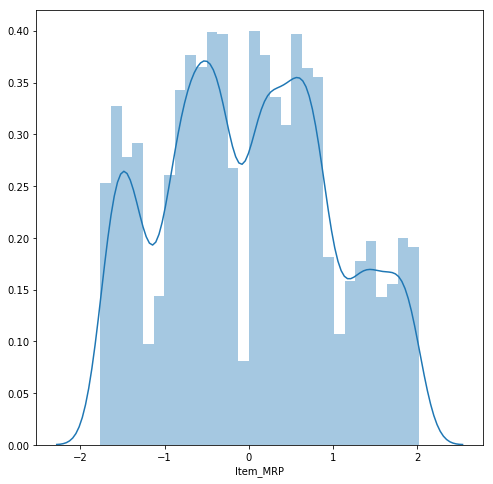

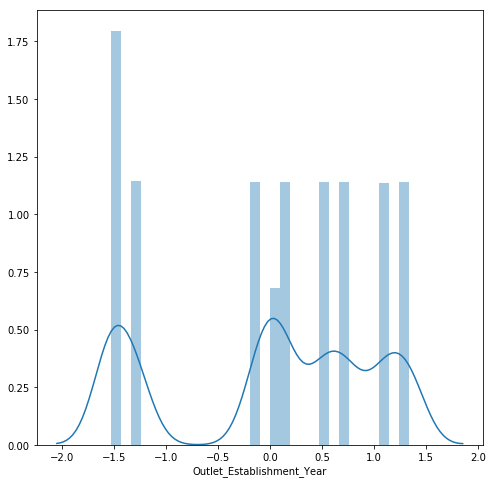

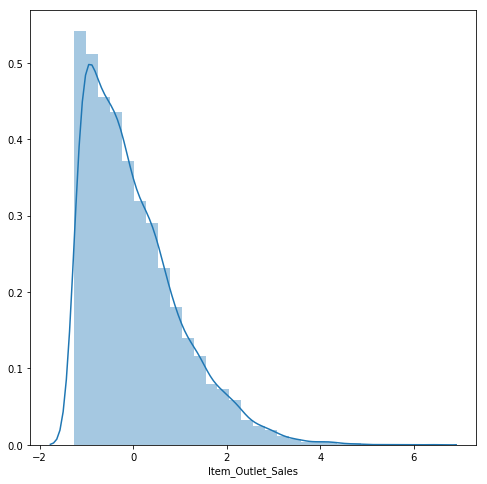

In [15]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [16]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [17]:
data[numcols] = qt.fit_transform(data[numcols])

In [18]:
#data[numcols]= data[numcols]+ 0.1

In [19]:
#for col in numcols:
#    data[col] = np.log(data[col])
    
   
    
#data

In [20]:
#numeric_cols = data.select_dtypes(include='number')
#Calculate the first and third quartiles for each column
#q1 = numeric_cols.quantile(0.25)
#q3 = numeric_cols.quantile(0.75)

#Calculate the IQR for each column
#iqr = q3 - q1

#Define the outlier bounds for each column
#lower_bounds = q1 - 1.5 * iqr
#upper_bounds = q3 + 1.5 * iqr

# Filter out rows that fall outside the bounds for each column
#for col in numeric_cols.columns:
#    data = data[(data[col] >= lower_bounds[col]) & (data[col] <= upper_bounds[col])]

# Print the filtered DataFrame
#data

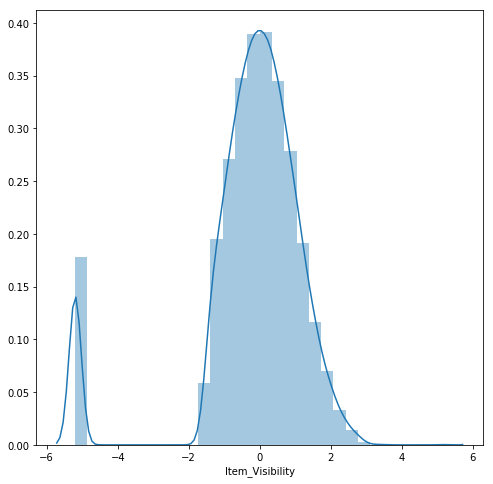

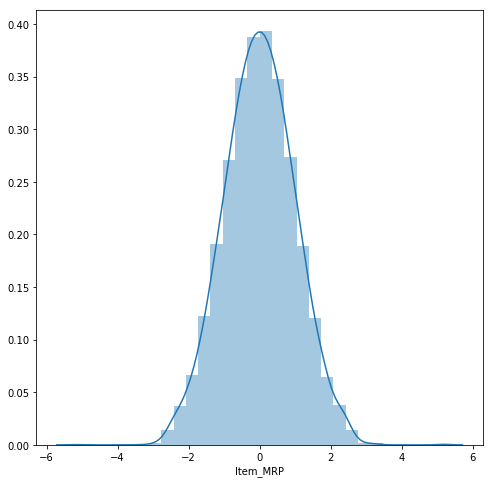

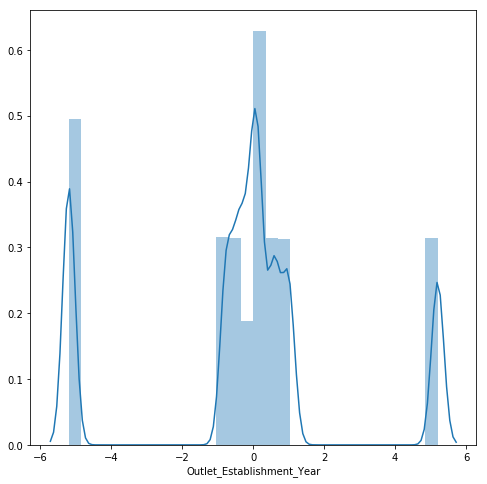

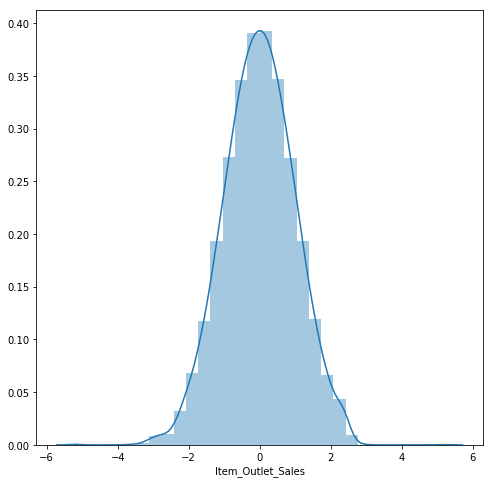

In [21]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [22]:
data.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [23]:
catcols=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [24]:
for i in catcols:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [25]:
corrr=data.corr()

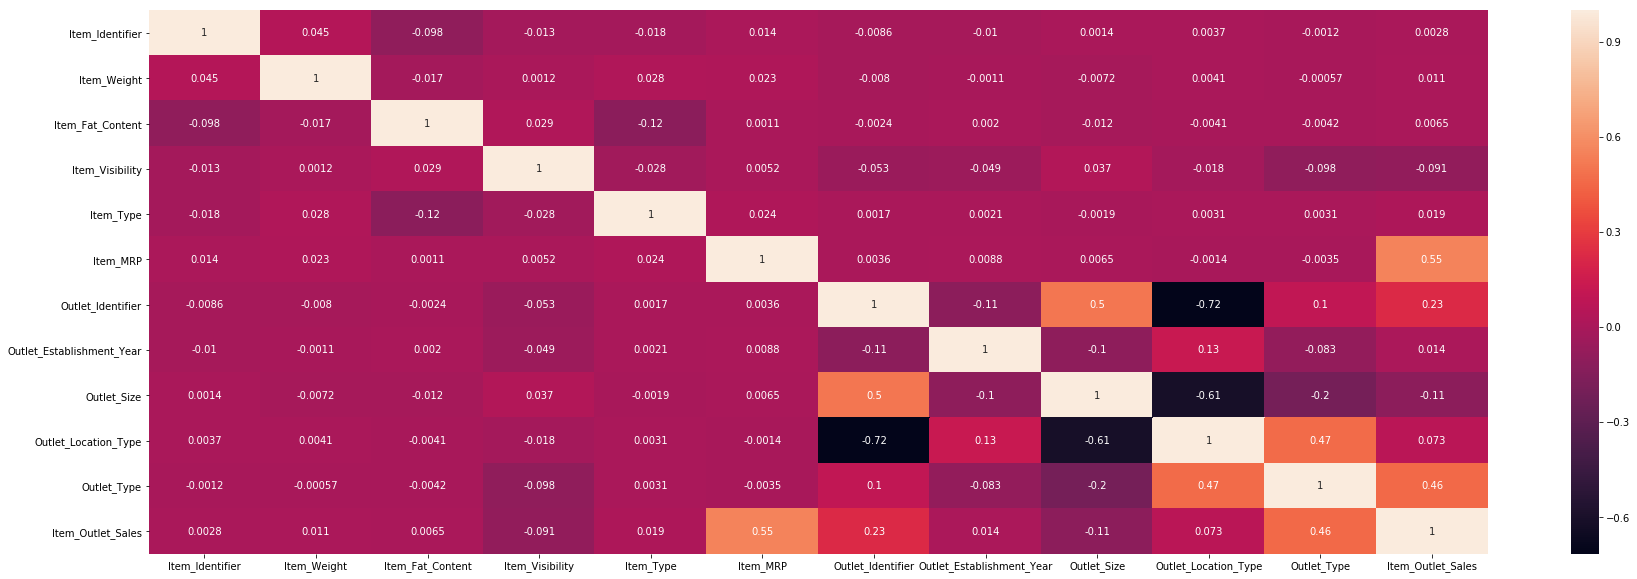

In [26]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr,annot=True)
plt.show()

In [27]:
data1=data.drop(['Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [28]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data[['Item_Outlet_Sales']]


In [29]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2,random_state=42)

In [31]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [32]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
# r2 of train and val
y_val_pred1 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred1)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred1)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred1 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred1)
print("R-squared score for test:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred1)
print("Mean squared error for test:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred1)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.5599347434645019
Mean squared error: 0.4326114550652993
Root Mean Squared Error: 0.6577320541567815
Mean Absolute Error: 0.5239887784652307
R-squared score for test: 0.5876349905837388
Mean squared error for test: 0.40575043081774964
Root Mean Squared Error: 0.6369854243369699
Mean Absolute Error: 0.5054990986749298


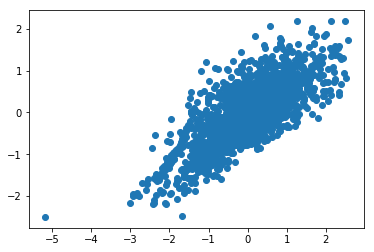

In [34]:
plt.scatter(y_test, y_test_pred1)

In [35]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [36]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
# r2 of train and val
y_val_pred2 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred2)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred2)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=2)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score for test:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error for test:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred2)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.6699002777485423
Mean squared error: 0.3245085110424637
Root Mean Squared Error: 0.5696564851228008
Mean Absolute Error: 0.44902342143037344
R-squared score for test: 0.6986649783871197
Mean squared error for test: 0.29650142967508675
Root Mean Squared Error: 0.5445194483901257
Mean Absolute Error: 0.4248413877064153


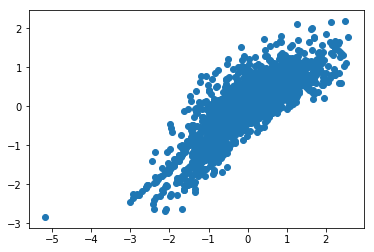

In [38]:
plt.scatter(y_test, y_test_pred2)

In [39]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [40]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [41]:
# r2 of train and val
y_val_pred3 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred3)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred3)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred3)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=3)
y_test_pred3 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred3)
print("R-squared score for test:", r2)
# mse of test and pred (degree=3)
mse = mean_squared_error(y_test, y_test_pred3)
print("Mean squared error for test:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred3)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.6600837077135434
Mean squared error: 0.334158808546122
Root Mean Squared Error: 0.5780647096529263
Mean Absolute Error: 0.45530559096312867
R-squared score for test: 0.6925141422171956
Mean squared error for test: 0.3025536027956166
Root Mean Squared Error: 0.5500487276556656
Mean Absolute Error: 0.42959355787906284


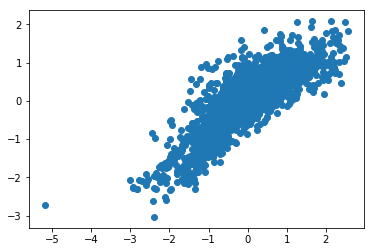

In [42]:
plt.scatter(y_test, y_test_pred3)

In [43]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [44]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
# r2 of train and val
y_val_pred4 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred4)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred4)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred4)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=3)
y_test_pred4 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred4)
print("R-squared score for test:", r2)
# mse of test and pred (degree=3)
mse = mean_squared_error(y_test, y_test_pred4)
print("Mean squared error for test:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred4)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.6105147579350573
Mean squared error: 0.3828881621391609
Root Mean Squared Error: 0.6187795747591874
Mean Absolute Error: 0.4829270472166919
R-squared score for test: 0.6491911992543222
Mean squared error for test: 0.34518162013482373
Root Mean Squared Error: 0.5875215912073561
Mean Absolute Error: 0.45610908151145124


In [46]:
y_test

,Item_Outlet_Sales
7503,-0.028279
2957,-1.255057
7031,-1.220543
1084,1.735545
856,0.299891
...,...
7205,0.627544
3257,-0.626843
6346,-0.882547
6318,-1.461927


In [47]:
pd.DataFrame(y_test_pred1)

,0
0,-0.636416
1,-0.905580
2,-0.531559
3,1.117384
4,0.274049
...,...
1700,-0.059844
1701,0.587837
1702,-1.066480
1703,-0.368995


In [48]:
! pip install xgboost

In [49]:
##XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics

In [50]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [51]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)


In [52]:
xgb_reg.fit(X_train_poly, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
y_pred = xgb_reg.predict(X_val_poly)

In [54]:
#regressor = XGBRegressor()

In [55]:
#regressor.fit(X_train_poly, y_train)

In [56]:
#sales_data_prediction = regressor.predict(X_val_poly)

In [57]:
r2_sales = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_sales)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.673342132444245
Mean squared error: 0.3211249542950993
Root Mean Squared Error: 0.5666788811091333
Mean Absolute Error: 0.44348891918336125


In [58]:
data_prediction =xgb_reg.predict(X_test_poly)

In [59]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, data_prediction)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.7010999158428464
Mean squared error: 0.2941055500560233
Root Mean Squared Error: 0.5423149915464474
Mean Absolute Error: 0.42106865759971496


# Bagging

In [60]:
from sklearn.ensemble import BaggingRegressor
# Create a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
linear_reg = LinearRegression()

# Create a bagging regressor
bag_reg = BaggingRegressor(base_estimator=linear_reg, n_estimators=10, max_samples=0.5, random_state=42)

# Fit the bagging model to the data
bag_reg.fit(poly_reg.fit_transform(X_train), y_train)


BaggingRegressor(base_estimator=LinearRegression(), max_samples=0.5,
                 random_state=42)

In [61]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_val))

In [62]:
# R squared Value
r2_data = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.6674083705254361
Mean squared error: 0.3269582104760491
Root Mean Squared Error: 0.5718025974722825
Mean Absolute Error: 0.4495571842483064


In [63]:
y_pred = bag_reg.predict(poly_reg.fit_transform(X_test))

In [64]:
# R squared Value
r2_data = metrics.r2_score(y_test, y_pred)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.6968564917865679
Mean squared error: 0.29828090708113725
Root Mean Squared Error: 0.5461509929324831
Mean Absolute Error: 0.42617150801283316
